In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

In [13]:
d = {'y' : pd.Series([85.09, 101.81, 104.05, 99.09,90.52,101.71,97.73,82.73,72.86], index=['1', '2', '3', '4','5','6','7','8','9']),
  'x1' : pd.Series([348.7, 400.1, 480.9, 498.3,520,543.7,559.1,561,571.8], 
                  index=['1', '2', '3', '4','5','6','7','8','9'])}

In [14]:
df = pd.DataFrame(d)

In [15]:
df

,x1,y
1,348.7,85.09
2,400.1,101.81
3,480.9,104.05
4,498.3,99.09
5,520.0,90.52
6,543.7,101.71
7,559.1,97.73
8,561.0,82.73
9,571.8,72.86


In [16]:
lm = smf.ols(formula='y ~ x1', data = df).fit()

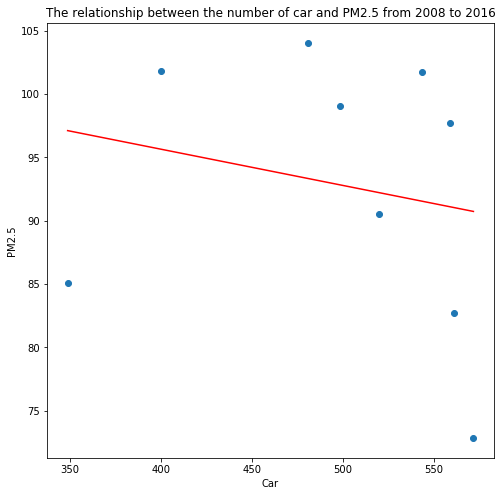

In [40]:
import matplotlib.pylab as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.scatter(df.x1,df.y)
plt.plot(df.x1,lm.predict(),c="r")
plt.xlabel('Car')
plt.ylabel('PM2.5')
plt.title('The relationship between the number of car and PM2.5 from 2008 to 2016')
plt.show()

In [2]:
data = pd.read_csv('data.csv')

In [27]:
data

,Average relative humidity(%),Average Temperature,Average wind speed (Km/h),PM2.5
0,42,1.7,8.0,33.50
1,54,1.3,5.6,104.54
2,76,1.1,5.0,259.08
3,67,2.0,6.3,273.17
4,35,-0.5,15.6,33.92
5,48,-0.7,6.1,102.75
6,62,2.1,7.0,144.58
7,36,2.6,20.0,89.75
8,42,-0.7,7.8,24.83
9,46,-1.7,5.0,50.71


In [3]:
data.columns = ['humidity', 'Temperature', 'wind','PM']

In [4]:
data.head()

,humidity,Temperature,wind,PM
0,42,1.7,8.0,33.50
1,54,1.3,5.6,104.54
2,76,1.1,5.0,259.08
3,67,2.0,6.3,273.17
4,35,-0.5,15.6,33.92


In [5]:
lm2 = smf.ols(formula = 'PM ~ humidity + Temperature + wind',data = data).fit()

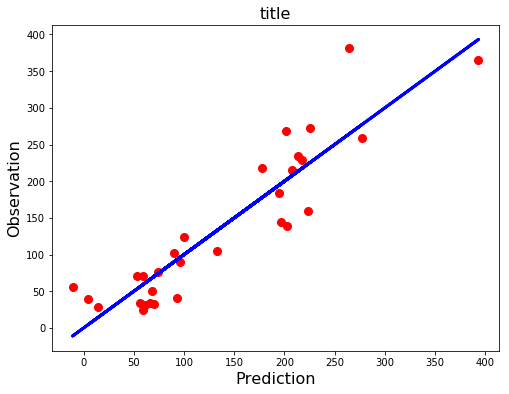

In [6]:
lmy = lm2.predict(data)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(lmy,data.PM,'or', markersize = 8) # Plot the observed value
plt.plot(lmy,lmy,'-b', lw = 3)                         # Plot the predicted value
# Students are not required to have such visualization settings as long as they got the correct answer
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)
plt.title('title', fontsize = 16)

In [37]:
data.corr()

,humidity,Temperature,wind,PM
humidity,1.000000,0.035097,-0.682090,0.892729
Temperature,0.035097,1.000000,0.193519,0.129287
wind,-0.682090,0.193519,1.000000,-0.464529
PM,0.892729,0.129287,-0.464529,1.000000


In [7]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PM   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     44.71
Date:                Thu, 30 Mar 2017   Prob (F-statistic):           2.10e-10
Time:                        19:16:56   Log-Likelihood:                -154.12
No. Observations:                  30   AIC:                             316.2
Df Residuals:                      26   BIC:                             321.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    -264.6228     55.551     -4.764      0.000      -378.810  -150.436
humidity        6.7201      0.702      9.570      0.000         5.277     8.163
Temperature     2.4516      4.711      0.520      0.607        -7.232    12.135
wind            5.5907      2.506      2.231      0.035         0.439    10.742
==============================================================================
Omnibus:                        3.892   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.544
Skew:                           0.682   Prob(JB):                        0.280
Kurtosis:                       3.417   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
import numpy as np

In [3]:
A = np.array([2,1,0,1,1,0,0,0,0])
B = np.array([1,2,0,1,1,0,0,0,0])
C = np.array([0,0,2,0,1,0,0,0,1])
D = np.array([1,1,0,2,1,0,0,1,0])
E = np.array([1,1,1,1,2,0,0,0,0])
F = np.array([0,0,1,0,0,2,0,0,1])
G = np.array([0,0,0,0,0,0,2,1,0])
H = np.array([0,0,0,1,0,0,0,2,0])
I = np.array([0,0,1,0,0,1,0,0,2])

In [53]:
c1 = np.array([4.0/3, 4.0/3, 1.0/3, 3.0/3, 4.0/3, 0, 0, 0, 0])
c2 = np.array([0, 0, 4.0/4, 0, 1.0/4, 3.0/4, 2.0/4, 1.0/4, 1.0])
c3 = np.array([1.0/2, 1.0/2, 0, 1.5, 0.5, 0, 0, 1.5, 0])

In [52]:
c = C+F+G+I
print c

[0 0 4 0 1 3 2 1 4]


In [4]:
import numpy

In [54]:
def calculate(n):    
    dis =numpy.linalg.norm(n-c1)
    dis2 =numpy.linalg.norm(n-c2)
    dis3 =numpy.linalg.norm(n-c3)
    print ('%0.4f, %0.4f, %0.4f'%(dis, dis2, dis3))

In [55]:
l = [A, B, C, D, E, F, G, H, I]
l2 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
j = 0
for i in l:
    print l2[j]
    j += 1
    calculate(i)

A
0.8819, 3.0721, 2.2913
B
0.8819, 3.0721, 2.2913
C
2.9059, 1.5612, 3.2016
D
1.5635, 3.1524, 1.1180
E
1.0541, 2.8174, 2.5000
F
3.4319, 1.3919, 3.3541
G
3.3830, 2.3318, 2.6926
H
3.0732, 2.6339, 1.1180
I
3.4319, 1.1990, 3.3541
